Title: **Innovation or Inequality: Do Patent Litigations Lead to Exacerbated Wealth Inequality?**

Section - 1: Introduction

Wealth inequality is a major global issue, affecting millions and increasing the vulnerability of already disadvantaged groups to economic shocks. But could one of the driving factors behind inequality be patents—or, more specifically, weaponized patent litigation?

Patents are crucial to research and, as discussed by Dam (2002), they incentivize investment by ensuring that financial returns can be secured. However, patents can also be misused as a tool for firms to engage in anti-competitive behavior. Through aggressive litigation against smaller firms, larger entities can impose overwhelming legal costs, ultimately driving competitors out of the market. Drahos and Frankel (2022) explore similar concerns, highlighting how patent litigation can be weaponized to consolidate market power and limit competition.

This can result in concentrated market dominance, inefficient markets, and negative outcomes for consumers, including higher prices and fewer choices. Therefore, intellectual property rights (IPRs) could play a role in driving wealth inequality, particularly in developed countries with greater innovation potential, as suggested by quantitative research from Saini and Mehra (2018).
Additionally, legal scholarship provides possible explanations for these mechanisms, particularly as discussed by Kapczynski (2015). She argues that IP litigation could serve multiple functions—it might act as a driver of inequality, a reflection of existing economic divides, a tool for redistribution, or a battleground for contesting resource allocation. Given the lack of consensus among researchers, this issue presents a critical area for further exploration

Despite these concerns, the negative economic impacts of patent litigation remain under-researched. Maskus (2022) explores the broader economic implications of patents and emphasizes the need for further study in this area. He points out that existing research produces inconclusive results, suggesting that the relationship between IPRs and inequality is shaped by highly complex mechanisms.



Section - 2: Data Cleaning and Loading

In [22]:
#importing useful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Loading CSV files

#assigned data set: Patent Litigations
cases = pd.read_csv("/content/drive/My Drive/ECO225_Final_Project/PART1/cases.csv")

#y-variable from extternal sourc:e
gini = pd.read_csv("/content/drive/My Drive/ECO225_Final_Project/PART1/Gini.csv")

#3 new x-variables from external soruces:
urbanization = pd.read_csv("/content/drive/My Drive/ECO225_Final_Project/PART1/urbanization_rate.csv", on_bad_lines='skip')
unemployment = pd.read_csv("/content/drive/My Drive/ECO225_Final_Project/PART1/US-Unemployment.csv", on_bad_lines='skip')
inflation= pd.read_csv("/content/drive/My Drive/ECO225_Final_Project/PART1/inflation.csv", header=0,on_bad_lines='skip')

In [4]:
#isolating relevant variables from the raw litigations data
clean_cases = cases[['case_row_id', 'case_number', 'case_cause', 'date_filed', 'date_closed']]
clean_cases['year_closed'] = clean_cases['date_closed'].str[0:4].astype(float)
clean_cases['year_filed'] = clean_cases['date_filed'].str[0:4].astype(float)


#aggregating cases filed/closed by year
cases_closed = clean_cases.groupby('year_closed')['case_number'].nunique().reset_index()
cases_closed.columns = ['year', 'cases_closed']
cases_filed = clean_cases.groupby('year_filed')['case_number'].nunique().reset_index()
cases_filed.columns = ['year', 'cases_filed']

#new df containing total cases filed/closed in a given year
annual_cases = pd.merge(cases_filed, cases_closed, on='year', how='outer').fillna(0)
annual_cases[['cases_filed', 'cases_closed']] = annual_cases[['cases_filed', 'cases_closed']].astype(float)
annual_cases['year'] = annual_cases['year'].astype(int)

#cleaning unemployment df and computing avg annual unemployment rates for the US
unemployment['year'] = unemployment['observation_date'].str[0:4].astype(int)
clean_unemployment = pd.DataFrame()
clean_unemployment['year'] = unemployment['observation_date'].str[0:4].astype(int).unique()
clean_unemployment['unemployment_rate'] = (unemployment.groupby(unemployment['observation_date'].str[0:4].astype(int))['UNRATE'].mean().values)

#isolating annual gini coeff data for the US
clean_gini = pd.DataFrame()
clean_gini['year'] = gini['observation_date'].str[0:4].astype(int)
clean_gini['gini'] = gini['SIPOVGINIUSA']

#converting year columns to rows in clean_urbanization df
clean_urbanization = urbanization.melt(
    id_vars=['Country Name'],
    var_name='year',
    value_name='Urban Rate')

clean_urbanization['year'] = pd.to_numeric(clean_urbanization['year'], errors='coerce')
clean_urbanization = clean_urbanization.dropna(subset=['year'])
clean_urbanization['year'] = clean_urbanization['year'].astype(int)
#isolating US data
clean_urbanization = clean_urbanization[clean_urbanization['Country Name'] == 'United States']
clean_urbanization = clean_urbanization.drop(columns=['Country Name'])
clean_urbanization = clean_urbanization.reset_index()


#converting year columns to rows in clean_inflation df
clean_inflation = inflation.melt(
    id_vars=['Country Name'],
    var_name='year',
    value_name='Inflation Rate')

clean_inflation['year'] = pd.to_numeric(clean_inflation['year'], errors='coerce')
clean_inflation = clean_inflation.dropna(subset=['year'])
clean_inflation['year'] = clean_inflation['year'].astype(int)
#isolating US data
clean_inflation = clean_inflation[clean_inflation['Country Name'] == 'United States']
clean_inflation = clean_inflation.drop(columns=['Country Name'])
clean_inflation = clean_inflation.reset_index()

<ipython-input-4-085719f863e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_cases['year_closed'] = clean_cases['date_closed'].str[0:4].astype(float)
<ipython-input-4-085719f863e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_cases['year_filed'] = clean_cases['date_filed'].str[0:4].astype(float)


In [5]:
#merging all variables into one df
complete_merged = pd.DataFrame()
complete_merged = pd.merge(clean_gini, annual_cases, on='year', how='inner')
complete_merged = pd.merge(complete_merged, clean_urbanization, on='year', how='inner')
complete_merged = pd.merge(complete_merged, clean_unemployment, on='year', how='inner')
complete_merged = pd.merge(complete_merged, clean_inflation, on='year', how='inner')
complete_merged = complete_merged.drop(columns=['index_x'])
complete_merged = complete_merged.drop(columns=['index_y'])

Section - 3: Summary Statistics

In [6]:
from tabulate import tabulate

# Generate summary stats
summary_stats = complete_merged.describe().transpose()

# Add variable descriptions
summary_stats["Description"] = [
    "Year",
    "Gini coefficient (income inequality)",
    "Number of cases filed",
    "Number of cases closed",
    "Unemployment rate (%)",
]
summary_stats = summary_stats[["Description", "mean", "std", "min", "25%", "50%", "75%", "max"]]

# Create a clean ASCII table
print(tabulate(summary_stats, headers="keys", tablefmt="grid"))

+-------------------+--------------------------------------+------------+------------+----------+------------+---------+----------+------------+
|                   | Description                          |       mean |        std |      min |        25% |     50% |      75% |        max |
+===================+======================================+============+============+==========+============+=========+==========+============+
| year              | Year                                 | 1995.84    |   15.1742  | 1963     | 1983.5     | 1996    | 2008.5   | 2021       |
+-------------------+--------------------------------------+------------+------------+----------+------------+---------+----------+------------+
| gini              | Gini coefficient (income inequality) |   38.9078  |    2.1659  |   34.7   |   37.3     |   40    |   40.7   |   41.5     |
+-------------------+--------------------------------------+------------+------------+----------+------------+---------+----------

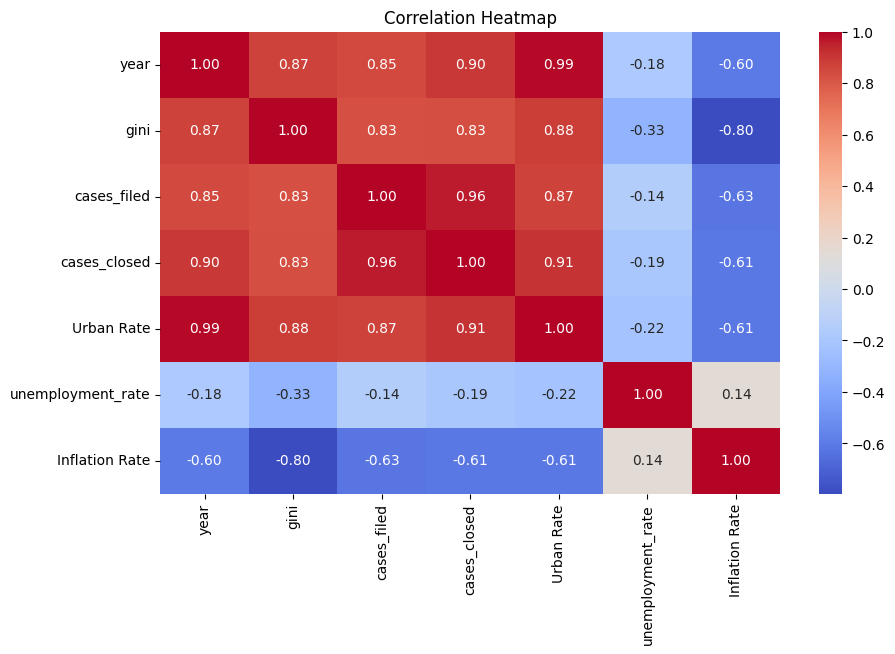

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(complete_merged.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [8]:
complete_merged.describe()

,year,gini,cases_filed,cases_closed,unemployment_rate
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1995.843137,38.907843,1777.725490,1808.215686,6.261928
std,15.174152,2.165903,1686.979052,1773.992022,1.573508
min,1963.000000,34.700000,0.000000,0.000000,3.675000
25%,1983.500000,37.300000,52.500000,10.000000,5.170833
50%,1996.000000,40.000000,1606.000000,1602.000000,5.850000
75%,2008.500000,40.700000,2722.000000,2774.500000,7.275000
max,2021.000000,41.500000,5742.000000,6020.000000,9.708333


Section - 4: Data Visualizations

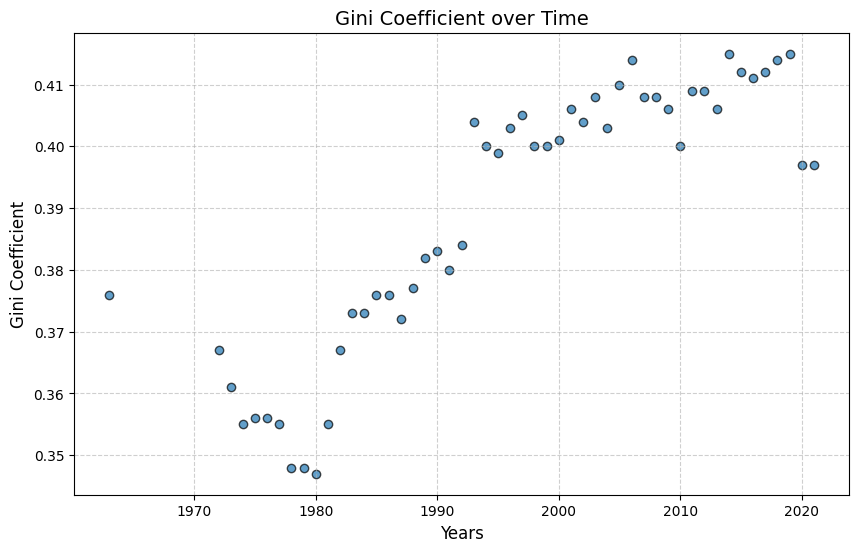

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(complete_merged['year'], complete_merged['gini']/100, alpha=0.7, edgecolor='k')
plt.title(f'Gini Coefficient over Time', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Gini Coefficient', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

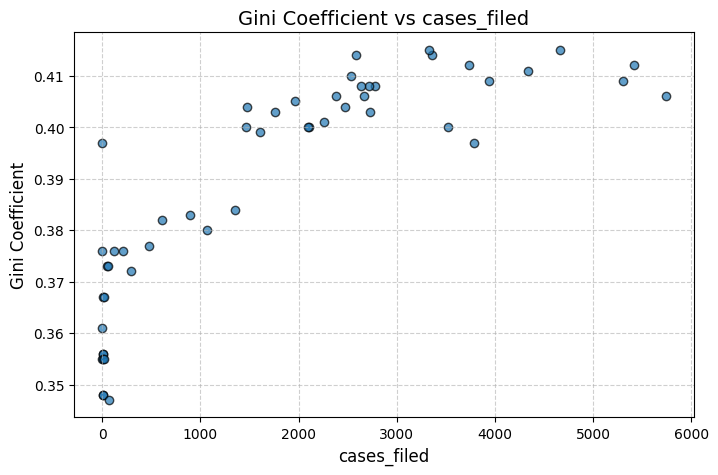

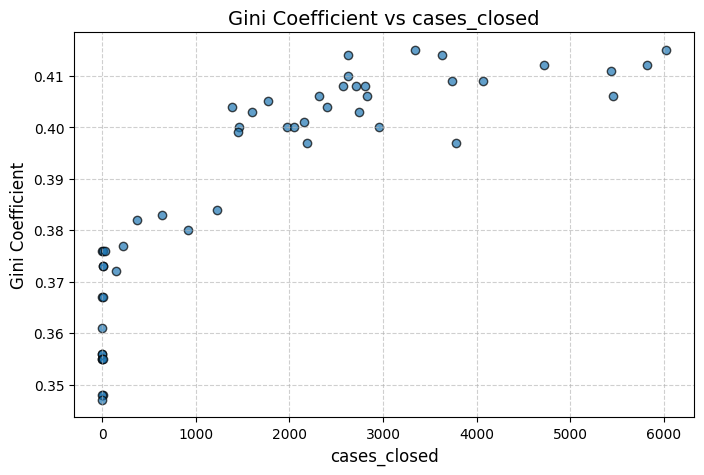

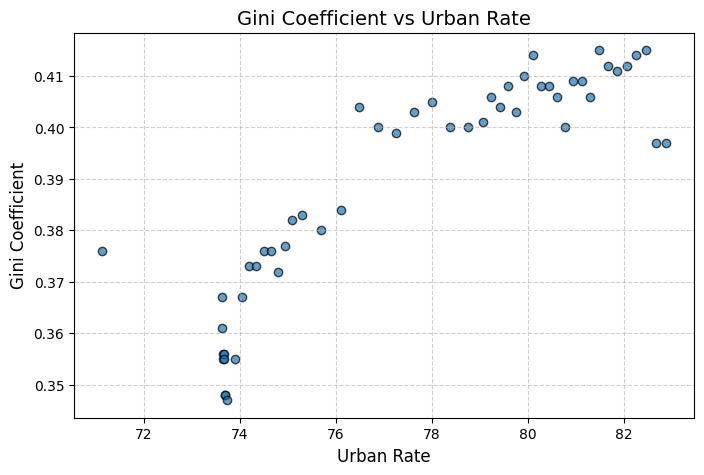

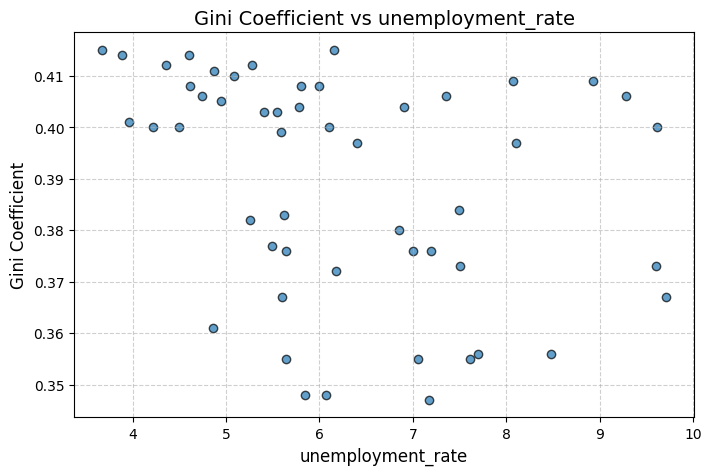

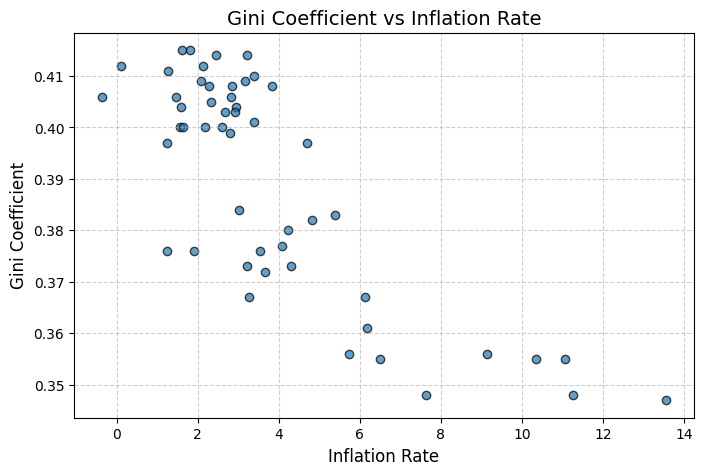

In [20]:
x_vars = ['cases_filed', 'cases_closed', 'Urban Rate', 'unemployment_rate', 'Inflation Rate']

# Loop through each variable and create a scatter plot with Gini
for x in x_vars:
    plt.figure(figsize=(8, 5))
    plt.scatter(complete_merged[x], complete_merged['gini']/100, alpha=0.7, edgecolor='k')
    plt.title(f'Gini Coefficient vs {x}', fontsize=14)
    plt.xlabel(x, fontsize=12)
    plt.ylabel('Gini Coefficient', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

Section - 5: Conclusion

References:


*   Dam, Kenneth W. 2002. The Economic Underpinnings of Patent Law. Chicago: University of Chicago Law School.
https://chicagounbound.uchicago.edu/cgi/viewcontent.cgi?article=1508&context=law_and_economics

*   Maskus, Keith E. 2022. Intellectual Property Rights and Economic Inequality: Theory and Evidence. Stockholm Intellectual Property Law Review, Vol. 5, Issue 1, September 2022.

*   Kapczynski, Amy. 2015. "Four Hypotheses on Intellectual Property and Inequality." Yale Law School Legal Scholarship Repository.
https://law.yale.edu/sites/default/files/documents/pdf/SELA15_Kapczynski_CV_Eng.pdf

*  Drahos, Peter, and Susy Frankel. 2022. Intellectual Property, Innovation, and Economic Inequality. Cambridge: Cambridge University Press.
https://www.cambridge.org/core/books/intellectual-property-innovation-and-economic-inequality/15F8912E63C4C397E0071E8F29B5B54B

*   Saini, S. S., and Meenakshi Mehra. 2018. "Impact of Strengthening Intellectual Property Rights Regime on Income Inequality: A Dynamic Panel Data Analysis." Economics Bulletin 38 (2): 1013-1023.


External Data Sources:



